In [1]:
using LinearAlgebra
using TrajectoryOptimization
using Plots

In [6]:
#Pauli spin matrices
i2 = [0 -1; 1 0] #2x2 unit imaginary matrix
Sx = [zeros(2,2) I; I zeros(2,2)]
Sy = [zeros(2,2) -i2; i2 zeros(2,2)]
Sz = [I zeros(2,2); zeros(2,2) -I]
iSx = [zeros(2,2) i2; i2 zeros(2,2)]
iSy = [zeros(2,2) I; -I zeros(2,2)]
iSz = [i2 zeros(2,2); zeros(2,2) -i2];

In [7]:
function qubit_dynamics!(ẋ,x,u)
      ẋ .= (Sx + u.*Sz)*x
end

qubit_dynamics! (generic function with 1 method)

In [8]:
n = 4 #state dimension
m = 1 #inut dimension
model = Model(qubit_dynamics!,n,m)
model_d = rk4(model);

In [11]:
dt = 0.01 #time step
N = 101 #number of knot points

x0 = [1.0, 0, 0, 0] #initial state
xf = [1/sqrt(2), 0, 1/sqrt(2), 0] #desired final state

u0 = [randn(m) for k = 1:N-1]; #random initial guess for control inputs

#Set up quadratic objective function
Q = 1.0*Diagonal(I,n)
R = 0.1*Diagonal(I,m)
Qf = 10.0*Diagonal(I,n)
obj = LQRObjective(Q,R,Qf,xf,N);

In [13]:
#Set up and solve traj. opt. problem
prob = Problem(model_d, obj, x0=x0, xf=xf, N=N, dt=dt)
initial_controls!(prob, u0) #random guess for initial controls
solver = solve!(prob, iLQRSolverOptions{Float64}(square_root=true, verbose=true));

    iter cost          expected    z         α         dJ        grad      zero_count ρ         info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    2     1.6598237503  4.17619019  0.965508  0.5       4.032144  5.543045 0           0e+00    
    3     0.6159125764  1.47716844  0.706697  1         1.043911  1.324288 0           0e+00    
    4     0.4060446556  0.22010831  0.953476  0.25      0.209868  1.365735 0           0e+00    
    5     0.3121884066  0.16111261  0.582551  0.5       0.093856  0.986238 0           0e+00    
    6     0.2375692529  0.0870098   0.857595  1         0.074619  0.624595 0           0e+00    
    7     0.2330734625  0.0066512   0.675937  0.5       0.004496  0.250771 0           0e+00    
    8     0.2327323872  0.00038863  0.877634  1         0.000341  0.043458 0           0e+00    
    9     0.2327251866  0.0

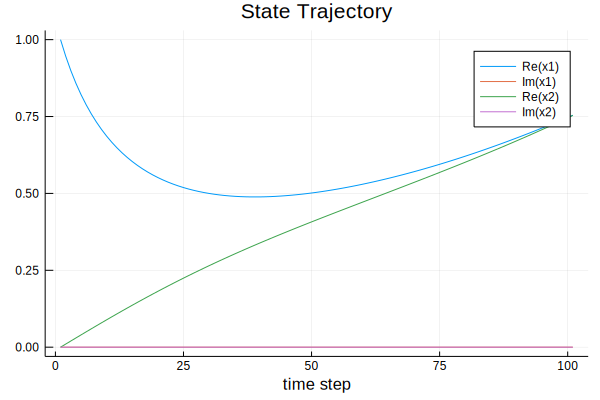

In [14]:
plot(prob.X,xlabel="time step",title="State Trajectory",label=["Re(x1)" "Im(x1)" "Re(x2)" "Im(x2)"])

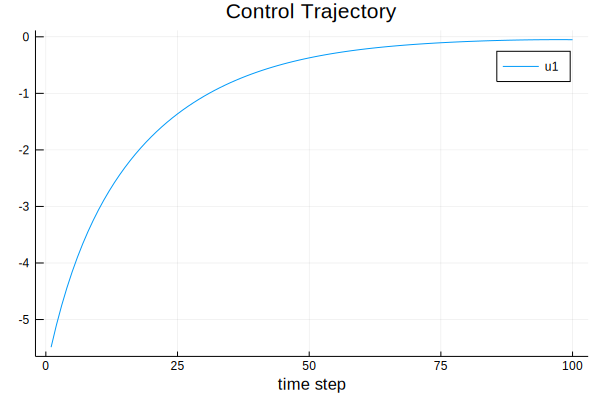

In [18]:
plot(prob.U,xlabel="time step",title="Control Trajectory",label="u1")